# Task1: Import Libraries

In [11]:
%matplotlib inline

import os
import numpy as np
import tensorflow as tf

from PIL import Image
from matplotlib import pyplot as plt

print('Using TensorFlow', tf.__version__)


Using TensorFlow 2.2.0


# Task2 : Rotation

In [0]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range = 40
)

In [0]:
image_path = '/content/cat.jpg'
 
plt.imshow(plt.imread(image_path))


In [0]:
x,y = next(generator.flow_from_directory('/content/drive/My Drive/Images',batch_size =1))
plt.imshow(x[0].astype('uint8'))


# Task3: Width and Height Shifts

In [0]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=[-100,-50,0,50,100],
    height_shift_range=[-50,0,50]
)

Found 1 images belonging to 1 classes.


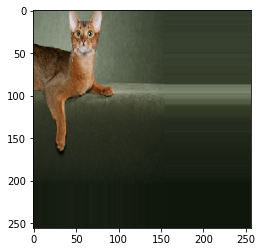

In [25]:
x,y = next(generator.flow_from_directory('/content/drive/My Drive/Images',batch_size =1))
plt.imshow(x[0].astype('uint8'))

# Task4: Brightness

Found 1 images belonging to 1 classes.


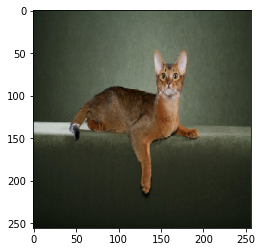

In [27]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    brightness_range = (0.,2.)
)
x,y = next(generator.flow_from_directory('/content/drive/My Drive/Images',batch_size =1))
plt.imshow(x[0].astype('uint8'))

# Task5: Shear Transformation

Found 1 images belonging to 1 classes.


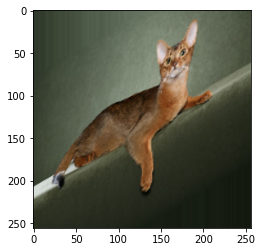

In [29]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    shear_range=45
)

x, y = next(generator.flow_from_directory('/content/drive/My Drive/Images', batch_size=1))
plt.imshow(x[0].astype('uint8'))

# Task6: Zoom

Found 1 images belonging to 1 classes.


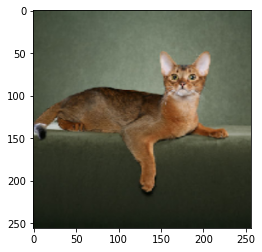

In [30]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    zoom_range=0.5
)

x, y = next(generator.flow_from_directory('/content/drive/My Drive/Images', batch_size=1))
plt.imshow(x[0].astype('uint8'))

# Task7: Channel Shift

Found 1 images belonging to 1 classes.


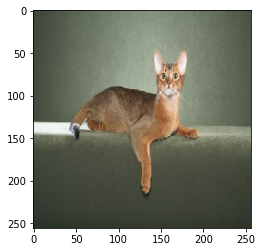

In [35]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    channel_shift_range=100
)

x, y = next(generator.flow_from_directory('/content/drive/My Drive/Images', batch_size=1))
plt.imshow(x[0].astype('uint8'))

In [36]:
x.mean()

97.998665

In [38]:
np.array(Image.open(image_path)).mean()

69.57810416666666

# Task8: Flips

Found 1 images belonging to 1 classes.


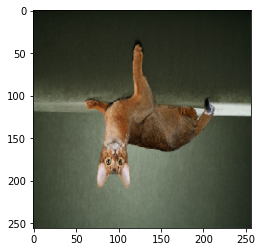

In [40]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True
)

x, y = next(generator.flow_from_directory('/content/drive/My Drive/Images', batch_size=1))
plt.imshow(x[0].astype('uint8'))

# Task9 : Normalisation
FEATURE WISE

In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

generator = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True
)

generator.fit(x_train)

In [47]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)
print(x_train.mean())

0.036425214 0.8480411 [[7]]
120.70756512369792


SAMPLE WISE

In [48]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    samplewise_center=True,
    samplewise_std_normalization=True
)

x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)

0.0 1.0 [[5]]


# Task 10: Rescale and Preprocessing Function

In [0]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1.,
    preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input
)


In [0]:
x , y = next(generator.flow(x_train,y_train,batch_size =1))

In [52]:
print(x.mean(),x.std(),y)

0.14683162 0.45165002 [[0]]


# Task11: Using in Model Training

In [0]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input,
    horizontal_flip=True,
    rotation_range=20

)

In [56]:
model = tf.keras.models.Sequential([
    tf.keras.applications.mobilenet_v2.MobileNetV2(
        include_top=False, input_shape=(32,32,3),pooling='avg'
    ),
    tf.keras.layers.Dense(10,activation='softmax')
])
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']

)

9412608/9406464 [==============================] - 0s 0us/step


In [58]:
_ = model.fit(
    generator.flow(x_train, y_train, batch_size=32),
    steps_per_epoch=20, epochs=20
)

Epoch 1/20
20/20 [==============================] - 5s 239ms/step - loss: 2.5171 - accuracy: 0.0578
Epoch 2/20
20/20 [==============================] - 5s 237ms/step - loss: 2.1587 - accuracy: 0.0609
Epoch 3/20
20/20 [==============================] - 5s 238ms/step - loss: 2.0824 - accuracy: 0.0906
Epoch 4/20
20/20 [==============================] - 5s 236ms/step - loss: 2.0252 - accuracy: 0.0906
Epoch 5/20
20/20 [==============================] - 5s 239ms/step - loss: 2.0426 - accuracy: 0.1328
Epoch 6/20
20/20 [==============================] - 5s 242ms/step - loss: 1.8847 - accuracy: 0.0766
Epoch 7/20
20/20 [==============================] - 6s 289ms/step - loss: 1.9033 - accuracy: 0.0859
Epoch 8/20
20/20 [==============================] - 6s 291ms/step - loss: 1.8963 - accuracy: 0.1031
Epoch 9/20
20/20 [==============================] - 5s 237ms/step - loss: 1.8427 - accuracy: 0.1234
Epoch 10/20
20/20 [==============================] - 5s 235ms/step - loss: 1.8202 - accuracy: 0.1375